In [62]:
using BSON: @load
using DeepQLearning
using Flux
using Random
using AutoViz

include("lane_change_mdp.jl")

policy_fname = "policy1.bson"
@load policy_fname policy 
# ncars = 9
# input = rand(Float32, ncars) * 100

mdp = laneChangeMDP()
scene_vec = simulate(mdp, policy)
# @show mdp.env.num_steps

a = 5
total_reward = -0.00181
(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 5
total_reward = -0.00362
(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 5
total_reward = -0.00543
(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 5
total_reward = -0.00724
(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 5
total_reward = -0.009049999999999999
(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 5
total_reward = -0.010859999999999998
(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 5
total_reward = -0.012669999999999997
(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 5
total_reward = -0.014479999999999996
(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 5
total_reward = -0.016289999999999995
(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 5
total_reward = -0.018099999999999995
(get_lane(

(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 5
total_reward = -0.17195000000000032
(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 5
total_reward = -0.17376000000000033
(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 5
total_reward = -0.17557000000000034
(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 5
total_reward = -0.17738000000000034
(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 5
total_reward = -0.17919000000000035
(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 5
total_reward = -0.18100000000000036
(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 5
total_reward = -0.18281000000000036
(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 5
total_reward = -0.18462000000000037
(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 5
total_reward = -0.18643000000000037
(get_lane(

(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 4
total_reward = -0.3420899999999995
(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 4
total_reward = -0.3438999999999995
(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 4
total_reward = -0.34570999999999946
(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 4
total_reward = -0.34751999999999944
(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 4
total_reward = -0.3493299999999994
(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 4
total_reward = -0.3511399999999994
(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 4
total_reward = -0.3529499999999994
(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 4
total_reward = -0.35475999999999935
(get_lane(mdp.env.roadway, (new_scene[EGO_ID]).state)).tag.lane = 1
a = 4
total_reward = -0.35656999999999933
(get_lane(mdp.e

201-element Array{Frame{Entity{VehicleState,VehicleDef,Int64}},1}:
 Scene(with 2 cars)
 Scene(with 2 cars)
 Scene(with 2 cars)
 Scene(with 2 cars)
 Scene(with 2 cars)
 Scene(with 2 cars)
 Scene(with 2 cars)
 Scene(with 2 cars)
 Scene(with 2 cars)
 Scene(with 2 cars)
 Scene(with 2 cars)
 Scene(with 2 cars)
 Scene(with 2 cars)
 ⋮                 
 Scene(with 2 cars)
 Scene(with 2 cars)
 Scene(with 2 cars)
 Scene(with 2 cars)
 Scene(with 2 cars)
 Scene(with 2 cars)
 Scene(with 2 cars)
 Scene(with 2 cars)
 Scene(with 2 cars)
 Scene(with 2 cars)
 Scene(with 2 cars)
 Scene(with 2 cars)

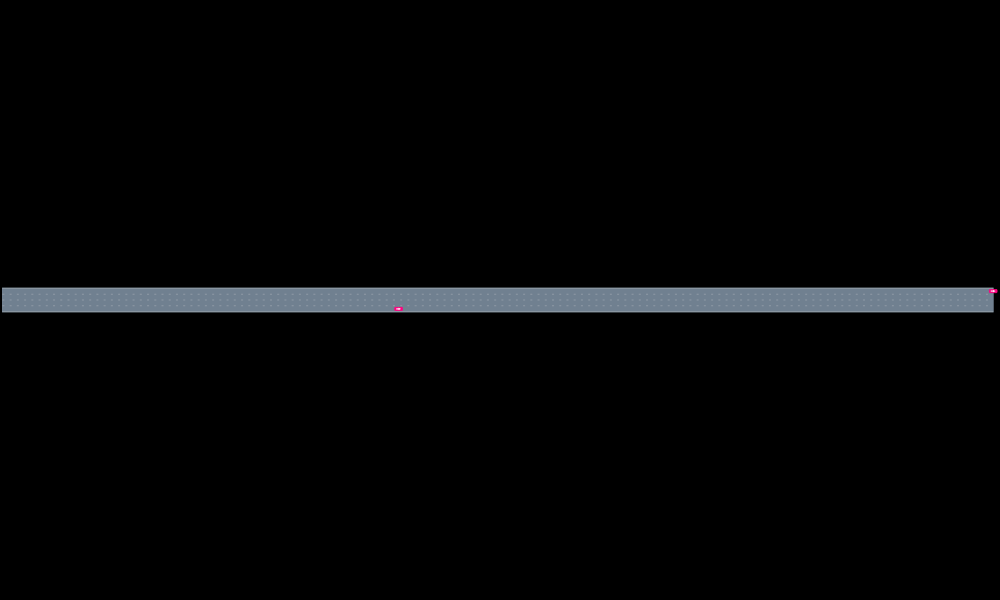

In [63]:
cam = FitToContentCamera(0.005)
render(scene_vec[end], mdp.env.roadway, cam=cam)

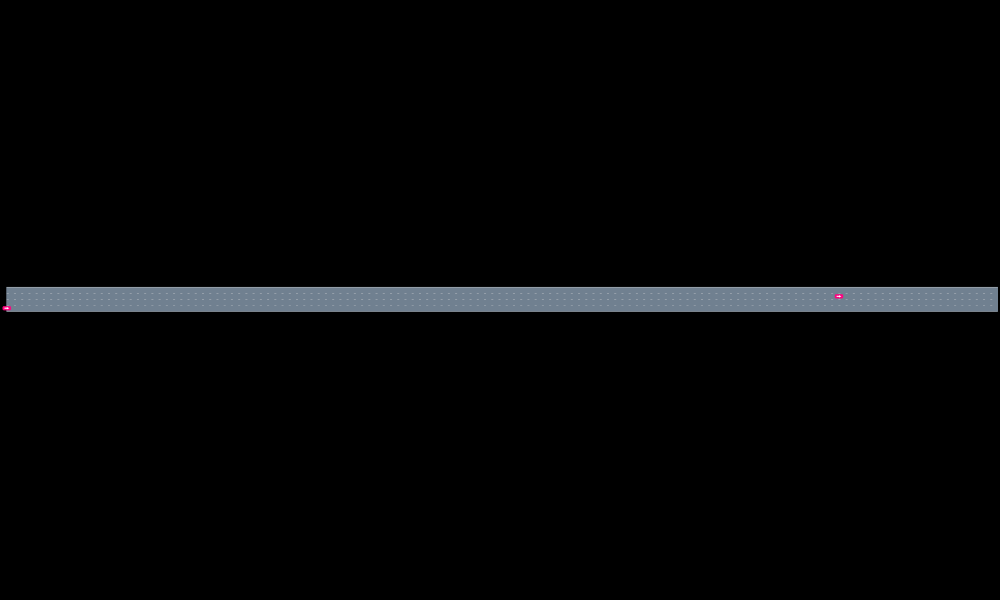

In [47]:
# cam = FitToContentCamera(0.005)
cam = StaticCamera(VecE2(140.0,0.0), 3.0)#4.75)
render(scene_vec[1], mdp.env.roadway, cam=FitToContentCamera(0.005))

In [31]:
using Reel
function animate_record(scenes::Vector{Scene},dt::Float64, roadway::Roadway{Float64}, cam=FitToContentCamera(0.0))
    duration =length(scenes)*dt::Float64
    fps = Int(1/dt)
    function render_rec(t, dt)
        frame_index = Int(floor(t/dt)) + 1
        return render(scenes[frame_index], roadway, cam=cam)
    end
    return duration, fps, render_rec
end

animate_record (generic function with 2 methods)

In [32]:
duration, fps, render_hist = animate_record(scene_vec, mdp.timestep, mdp.env.roadway, FitToContentCamera(0.0))
film = roll(render_hist, fps = fps, duration = duration)
write("policy_test.mp4", film)

"policy_test.mp4"